# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
from scipy import stats
import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here

def dice_throw(throws=10, dice_faces = 6):
    dice_list = []
    
    for i in range(throws):
        dice_list.append(random.choice(np.arange(1,(dice_faces +1),1)))
    
    throws_df = pd.DataFrame(dice_list, columns=['Number'])
    return throws_df


In [3]:
dice = dice_throw()
dice

,Number
0,1
1,6
2,2
3,4
4,1
5,2
6,6
7,3
8,4
9,4


#### 2.- Plot the results sorted by value.

In [4]:
dice = dice.sort_values(by='Number')
dice

,Number
0,1
4,1
2,2
5,2
7,3
3,4
8,4
9,4
1,6
6,6


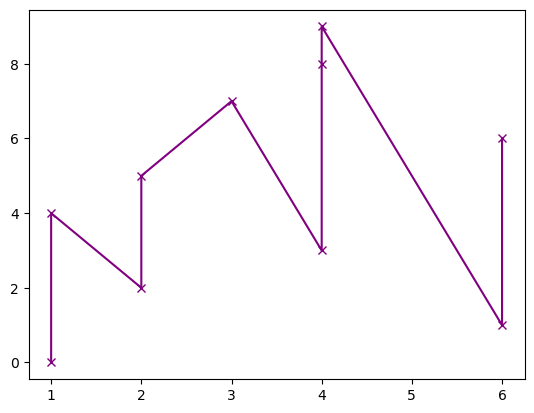

In [5]:
# your code here

plt.plot(dice['Number'],
        dice.index,
        color='purple',
        marker='x')
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

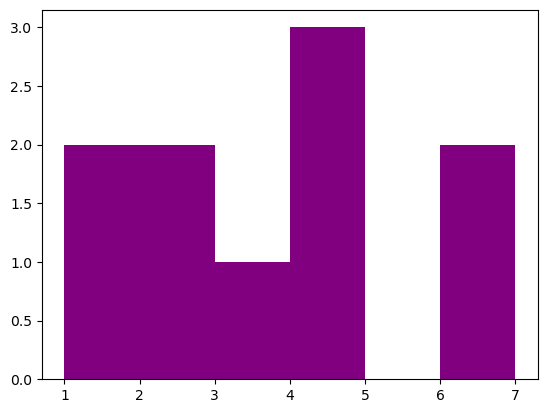

In [24]:
# your code here
dice = dice.sort_index()
dice

plt.hist(dice, bins=6,
        range=(1,7),
        color= 'purple',
        rwidth = 2)
plt.show()


In [7]:
"""
your comments here
the first plot was unorganized and it wasn't clear the meaning of it.

The second plot makes sense because every dice number has a unique bar
regarding the quantity of the number of times it showed up.
"""

"\nyour comments here\nthe first plot was unorganized and it wasn't clear the meaning of it.\n\nThe second plot makes sense because every dice number has a unique bar\nregarding the quantity of the number of times it showed up.\n"

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
sum(dice['Number'])

33

In [9]:
# your code here
def mean(data):
    sum_data = sum(data)
    len_data = len(data)
    return sum_data/len_data
mean(dice['Number'])


3.3

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [10]:
# your code here

def freq_d (values):
    freq_d = {}
    for dice_n in values:
        if dice_n in freq_d:
            freq_d[dice_n] += 1
        else:
            freq_d[dice_n] = 1
            
    return freq_d

freq_d (dice['Number'])

{1: 2, 6: 2, 2: 2, 4: 3, 3: 1}

In [91]:
dice_sorted = list(dice['Number'].sort_values())
dice_sorted

[1, 1, 2, 2, 3, 4, 4, 4, 6, 6]

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [92]:
# your code here

def median(data):
    sorted_data = sorted(data)
    len_data = len(sorted_data)
    midle_index = (len_data) // 2
    if len_data %2 == 0:
        return int(((sorted_data[int(midle_index)]) + (sorted_data[(int(midle_index))-1])))/2
    else:
        return int(sorted_data[int(((len_data-1)/2))])
        

median(dice_sorted)

3.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [93]:
dice_list = sorted(list(dice['Number']))

In [94]:
def quantiles(value_list):
    value_list = sorted(value_list)
    
    # 2q
    second_q = median(value_list)

    if len(value_list) % 2 == 0:
        # 1q
        first_q = median(value_list[:int(len(value_list)/2)])
        # 3q
        third_q = median(value_list[int(len(value_list)/2):])

    else:
        # 1q
        first_q = median(value_list[:int(len(value_list)/2 -1)])
        # 3q
        third_q = median(value_list[int(len(value_list)/2-1):])
    
    return first_q, second_q, third_q

quantiles(dice_list)

(2, 3.5, 4)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

,times
value,
1,12
2,17
3,14
4,22
5,12
6,23


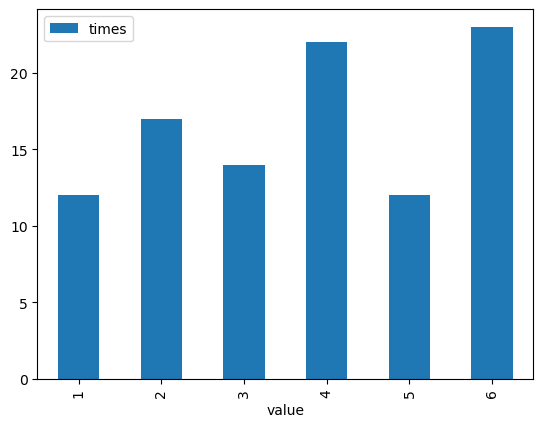

In [95]:
# your code here

roll_dice = pd.read_csv('data/roll_the_dice_hundred.csv')
rolling_sorted = roll_dice.value_counts(['value'])
roll_dice1 = pd.DataFrame(rolling_sorted)
roll_dice1 = roll_dice1.sort_values('value',ascending=True)
roll_dice1 = roll_dice1.rename(columns={0:'times'})
roll_dice1 = roll_dice1.reset_index().set_index('value')
roll_dice1.plot(kind='bar')
plt.show

roll_dice1

In [106]:
len(roll_dice)/6

16.666666666666668

In [97]:
"""
your comments here

The values are around the mean of times that we expect. In this case, 16.6
"""

'\nyour comments here\n\nThe values are around the mean of times that we expect. In this case, 16.6\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [112]:
# your code here
mean(roll_dice['value'])


3.74

#### 3.- Now, calculate the frequency distribution.


In [113]:
# your code here
freq_d (roll_dice['value'])


{1: 12, 2: 17, 6: 23, 5: 12, 4: 22, 3: 14}

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

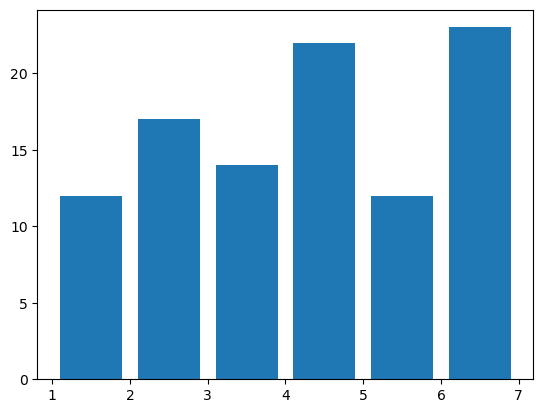

In [138]:
# your code here

plt.hist(roll_dice['value'],bins = 6, range=(1,7), rwidth = 0.8)

plt.show()

In [141]:
"""
your comments here

We are expecting a mean of 3.5
And our mean is 3.74, meaning that we have more values on the right side of the graph.
And indeed, we can see in the histogram that we have many values on the 4 and the 6, which skew the data towards the right.
"""

'\nyour comments here\n\nWe are expecting a mean of 3.5\nAnd our mean is 3.74, meaning that we have more values on the right side of the graph.\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

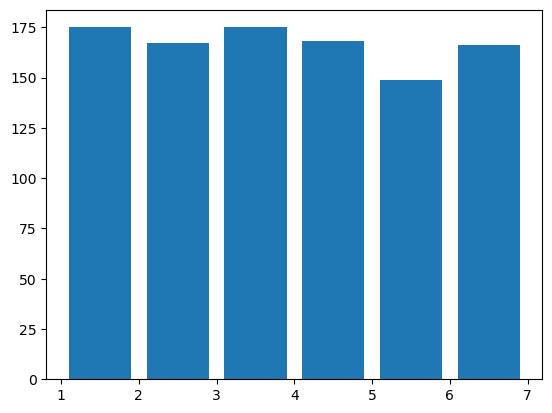

In [145]:
# your code here
roll_dice_thousand = pd.read_csv('data/roll_the_dice_thousand.csv')
roll_dice_thousand


plt.hist(roll_dice_thousand['value'],bins = 6, range=(1,7), rwidth = 0.8)

plt.show()


In [142]:
"""
your comments here
Now we have more data and the values are more close to each other, so there is less deviation, and it is less skewed.
"""

'\nyour comments here\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

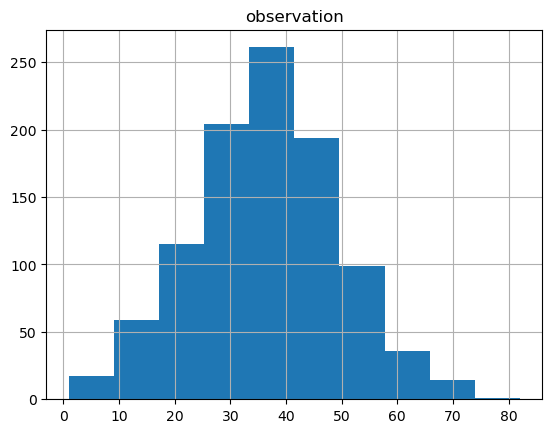

In [154]:
# your code here
age = pd.read_csv('data/ages_population.csv')
age.hist()
plt.show()

In [155]:
"""
The mean could be around 38, and the standard deviation could be around 15
"""

'\nThe mean would be around 38, and the standard deviation to be 15\n'

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [156]:
# your code here

print(mean(age['observation']))
age['observation'].std()

36.56


12.816499625976762

In [157]:
"""
your comments here

They were approximate, actually the standard deviation was a little bit below what we expected.So most data is compiled in a way smaller range than what we thought<.
"""

'\nyour comments here\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

array([[<AxesSubplot:title={'center':'observation'}>]], dtype=object)

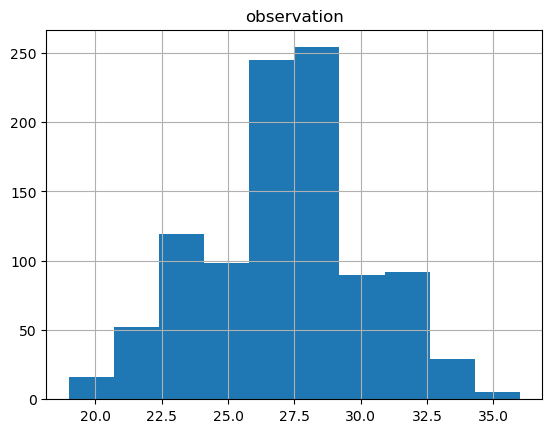

In [159]:
# your code here
age2 = pd.read_csv('data/ages_population2.csv')
age2.hist()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [160]:
"""
your comments here

The data is less disperse, so the standard deviation probably has a fewer value.
The mean could be around 27
And the range is shorter
"""

'\nyour comments here\nThe mean could be around 27\nThe data is less disperse, so the standard deviation probably has a fewer value.\nAnd the range is shorted\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [163]:
# your code here

print(age2['observation'].mean())
print(age2['observation'].std())


27.155
2.969813932689186


In [ ]:
"""
your comments here
Indeed, the mean was around 27 and the standard deviation is way less than the first csv.
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

array([[<AxesSubplot:title={'center':'observation'}>]], dtype=object)

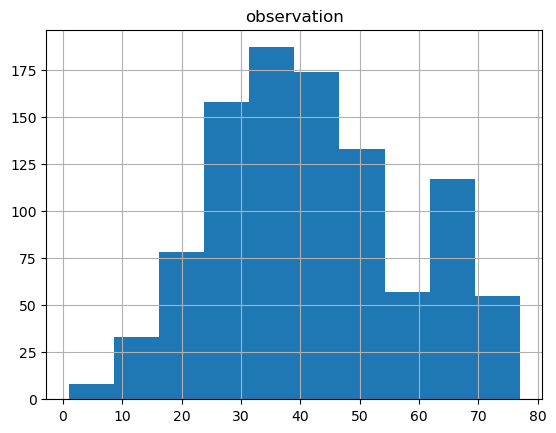

In [165]:
# your code here
age3 = pd.read_csv('data/ages_population3.csv')
age3.hist()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [166]:
# your code here
print(age3['observation'].mean())
print(age3['observation'].std())


41.989
16.144705959865934


In [172]:
"""
your comments here
The mean is a little bit higher than 40, because we have a skewed graph.
And the data is a little more disperse, so the standard deviation is a little bit higher.
"""

'\nyour comments here\nThe mean is a little bit higher than 40, because we have a skewed graph.\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [175]:
# your code here

print(age3.quantile(0))
print(age3.quantile(0.25))
print(age3.quantile(0.5))
print(age3.quantile(0.75))
print(age3.quantile(1))

observation    1.0
Name: 0.0, dtype: float64
observation    30.0
Name: 0.25, dtype: float64
observation    40.0
Name: 0.5, dtype: float64
observation    53.0
Name: 0.75, dtype: float64
observation    77.0
Name: 1.0, dtype: float64


In [176]:
"""
your comments here

So our range is between 1 and 77.
The mean was 41 and the median is 40, so the data is very balanced.
The the percentil 75 is a little bit more distant from the median than the 25 percentil to the median.
It means that we have more disperse data on the right side of the graph.
"""

'\nyour comments here\n\nSo our range is between 1 and 77.\nThe mean was 41 and the median is 40, so the data is very balanced.\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [171]:
# your code here

print(age3.quantile(0.4))
print(age3.quantile(0.6))


observation    36.0
Name: 0.4, dtype: float64
observation    45.0
Name: 0.6, dtype: float64


In [ ]:
"""
your comments here
As we saw earlier, on the right side we have a more disperse data
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""